# Convolution Image Net

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from utils.nn_visualization import variable_summaries
from utils.data import init_model_logging
from utils.nn_graph import simple_layer
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
import pandas as pd
import matplotlib.pylab as plt

## Load data

In [3]:
data = input_data.read_data_sets('/data/fashion/', one_hot=True)
img_shape = (28, 28)
class_id2class_name_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'}

Extracting /data/fashion/train-images-idx3-ubyte.gz
Extracting /data/fashion/train-labels-idx1-ubyte.gz
Extracting /data/fashion/t10k-images-idx3-ubyte.gz
Extracting /data/fashion/t10k-labels-idx1-ubyte.gz


In [33]:
def data_generator():
    while True:
        images, labels = data.train.next_batch(32)
        images = images.reshape((-1, 28, 28, 1))
        yield (images, labels)
    

## Keras

In [4]:
import keras as k
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense
from keras.models import Model

Using TensorFlow backend.


In [34]:
images = Input(shape=(28, 28, 1))
conv_layer_1 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', 
                      kernel_initializer='glorot_uniform')(images)
conv_layer_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_layer_1)

conv_layer_2 = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(conv_layer_1)
conv_layer_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_layer_2)

flatten_layer = Flatten()(conv_layer_2)
prediction = Dense(10, activation='softmax')(flatten_layer)

model = Model(inputs=images, outputs=prediction)

In [35]:
conv_layer_1._keras_shape, conv_layer_2._keras_shape

((None, 14, 14, 32), (None, 7, 7, 64))

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mse', 'accuracy'])

In [37]:
valid_images = data.validation.images.reshape((-1, 28, 28, 1))
valid_labels = data.validation.labels

In [38]:
valid_images.shape, valid_labels.shape

((5000, 28, 28, 1), (5000, 10))

In [39]:
model.fit_generator(data_generator(), steps_per_epoch=3, epochs=50,
          validation_data=(valid_images, valid_labels))

Epoch 1/50
3/3 [==============================] - 4s 1s/step - loss: 2.2678 - mean_squared_error: 0.0893 - acc: 0.1562 - val_loss: 2.2326 - val_mean_squared_error: 0.0886 - val_acc: 0.1022
Epoch 2/50
3/3 [==============================] - 1s 248ms/step - loss: 2.2339 - mean_squared_error: 0.0888 - acc: 0.0625 - val_loss: 2.1188 - val_mean_squared_error: 0.0862 - val_acc: 0.2610
Epoch 3/50
3/3 [==============================] - 1s 244ms/step - loss: 2.0712 - mean_squared_error: 0.0851 - acc: 0.4062 - val_loss: 1.9648 - val_mean_squared_error: 0.0825 - val_acc: 0.5312
Epoch 4/50
3/3 [==============================] - 1s 244ms/step - loss: 1.9258 - mean_squared_error: 0.0812 - acc: 0.5521 - val_loss: 1.7746 - val_mean_squared_error: 0.0770 - val_acc: 0.5810
Epoch 5/50
3/3 [==============================] - 1s 244ms/step - loss: 1.6967 - mean_squared_error: 0.0740 - acc: 0.5625 - val_loss: 1.5930 - val_mean_squared_error: 0.0707 - val_acc: 0.4746
Epoch 6/50
3/3 [===========================

3/3 [==============================] - 1s 293ms/step - loss: 0.5484 - mean_squared_error: 0.0288 - acc: 0.7708 - val_loss: 0.5709 - val_mean_squared_error: 0.0287 - val_acc: 0.7960
Epoch 44/50
3/3 [==============================] - 1s 304ms/step - loss: 0.6377 - mean_squared_error: 0.0313 - acc: 0.8021 - val_loss: 0.5928 - val_mean_squared_error: 0.0303 - val_acc: 0.7796
Epoch 45/50
3/3 [==============================] - 1s 291ms/step - loss: 0.5706 - mean_squared_error: 0.0315 - acc: 0.7708 - val_loss: 0.5984 - val_mean_squared_error: 0.0310 - val_acc: 0.7710
Epoch 46/50
3/3 [==============================] - 1s 267ms/step - loss: 0.6985 - mean_squared_error: 0.0341 - acc: 0.7396 - val_loss: 0.5730 - val_mean_squared_error: 0.0293 - val_acc: 0.7870
Epoch 47/50
3/3 [==============================] - 1s 265ms/step - loss: 0.5233 - mean_squared_error: 0.0274 - acc: 0.8021 - val_loss: 0.5376 - val_mean_squared_error: 0.0269 - val_acc: 0.8104
Epoch 48/50
3/3 [==============================

In [40]:
_prediction = model.predict(valid_images)

## Results evaluation

In [41]:
from utils.results_evaluation import get_info_df
from utils.results_evaluation import get_accuracy
from utils.results_evaluation import get_false_positives
from utils.results_evaluation import get_info_df
from utils.results_evaluation import get_rec_prec
from utils.results_evaluation import plot_coocurance_matrix
from utils.results_evaluation import plot_examples 

In [42]:
df = get_info_df(data.validation.labels, _prediction, class_id2class_name_mapping, data.validation.images)

In [43]:
get_accuracy(df)

80.34

In [44]:
get_rec_prec(df, class_id2class_name_mapping)

,class_name,precision,recall
0,T-shirt/top,68.61,85.12
1,Trouser,96.15,94.42
2,Pullover,78.17,61.11
3,Dress,83.43,84.43
4,Coat,59.22,86.89
5,Sandal,77.62,99.19
6,Shirt,64.41,30.83
7,Sneaker,94.04,74.02
8,Bag,92.26,94.90
9,Ankle boot,93.16,91.50


In [45]:
fp = get_false_positives(df, 'Shirt')

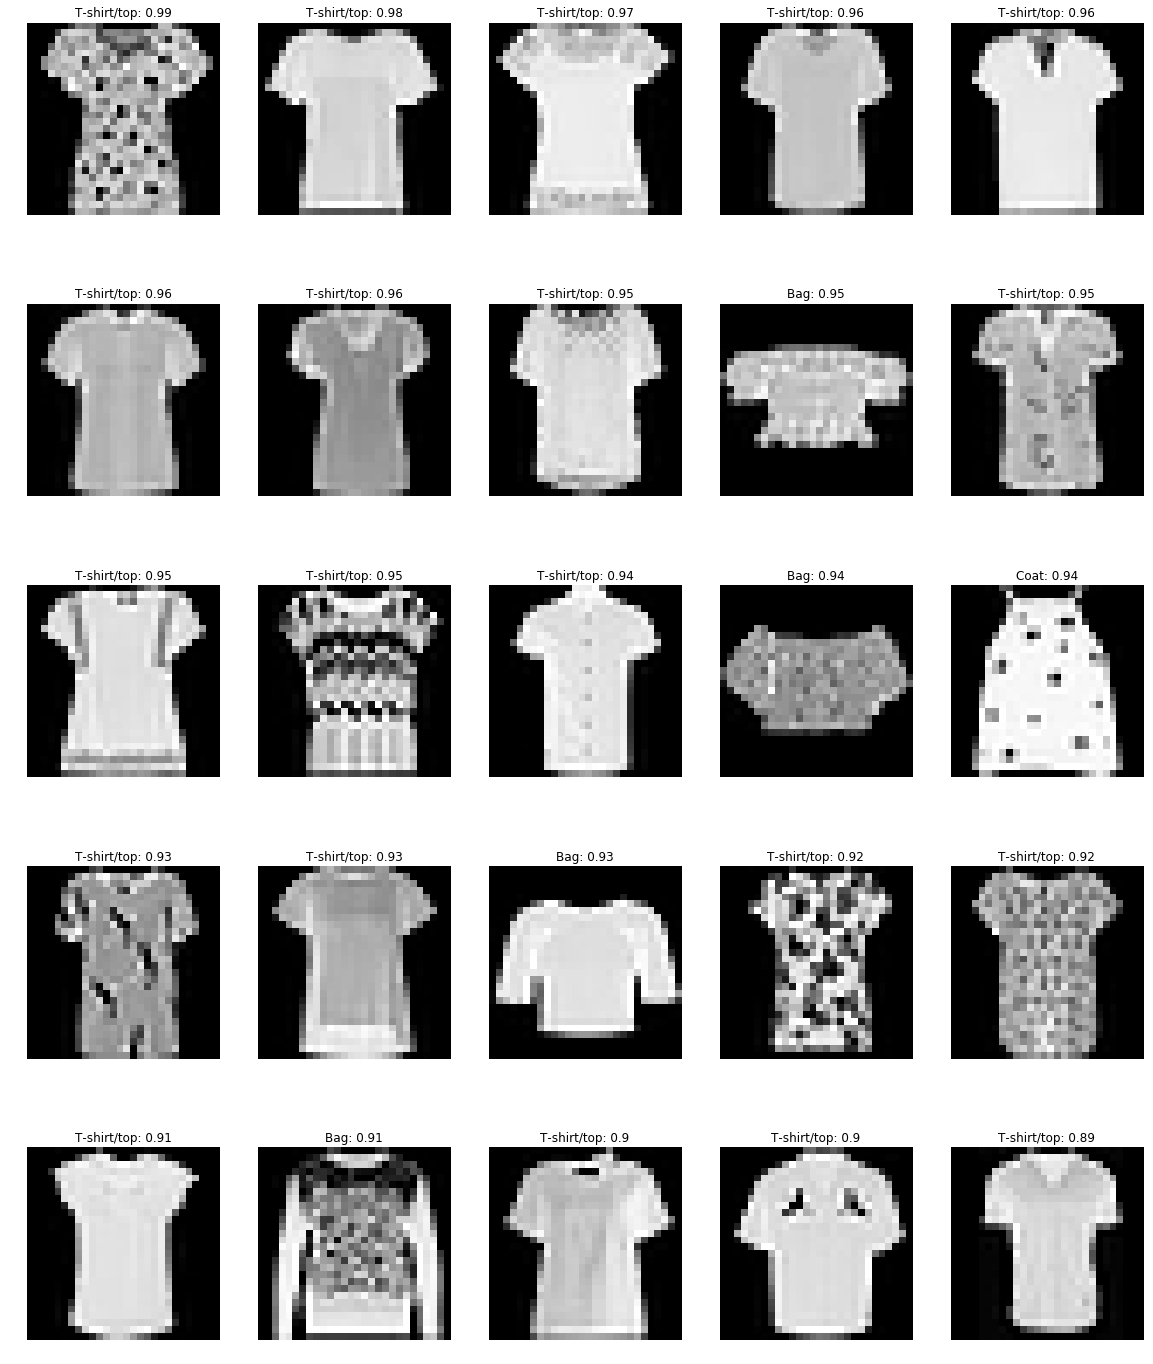

In [46]:
plot_examples(fp)

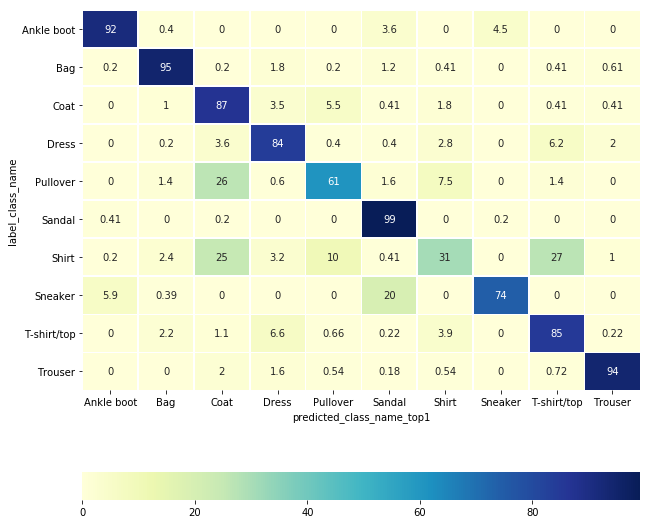

In [47]:
plot_coocurance_matrix(df, use_top3=False, use_log=False)